In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

sns.set_style("white")
pollution = pd.read_csv('pollution_us_2000_2016.csv')

In [15]:
pollution.head(5)
pollution_head = pollution.head(100000)

In [16]:
pollution_head.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,50006.000000,100000.000000,100000.000000,100000.000000,50014.000000
mean,42343.39316,20.20874,75.222160,1308.678880,17.443198,32.845496,12.379540,30.979660,0.024154,0.038909,10.098380,35.672300,3.462838,8.268135,10.205580,13.533776,0.554412,1.007955,8.812000,9.571100
std,27833.88418,16.39009,78.156817,1965.391561,11.301574,18.996186,7.821922,17.304112,0.011989,0.017222,3.843411,22.172453,3.959509,10.535005,6.659506,16.171038,0.470385,1.006670,8.029552,9.003667
min,0.00000,4.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16645.75000,6.00000,19.000000,9.000000,9.565217,20.000000,6.000000,19.000000,0.015167,0.027000,9.000000,23.000000,0.875000,2.000000,5.000000,3.000000,0.254167,0.400000,1.000000,5.000000
50%,41645.50000,12.00000,67.000000,97.000000,15.500000,31.000000,13.000000,29.000000,0.023542,0.038000,10.000000,32.000000,2.166667,5.000000,10.000000,7.000000,0.452174,0.700000,7.000000,7.000000
75%,66645.25000,36.00000,97.000000,2006.000000,23.043478,43.000000,20.000000,41.000000,0.032000,0.050000,11.000000,42.000000,4.600000,10.600000,14.000000,17.000000,0.725000,1.200000,17.000000,11.000000
max,91645.00000,51.00000,510.000000,9003.000000,139.541667,267.000000,23.000000,132.000000,0.095083,0.132000,23.000000,207.000000,39.114286,237.000000,23.000000,172.000000,7.508333,19.900000,23.000000,201.000000


Outcome variable:  
Categorical variables: State, City  
Continuous variables: Date Local, NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour  

In [17]:
pollution_data = pollution_head.iloc[:,:13]
pollution_data.columns = ['row', 'state_code', 'country_code', 'site_num', 'address', 'state', 'county', 'city', 'local_date', 'no2_units', 'no2_mean', 'no2_max', 'no2_hour']
pollution_data

,row,state_code,country_code,site_num,address,state,county,city,local_date,no2_units,no2_mean,no2_max,no2_hour
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19
6,6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19
7,7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8


In [18]:
nitrogen_dioxide = pollution_data[['no2_mean', 'no2_max', 'no2_hour']]
nitrogen_dioxide

,no2_mean,no2_max,no2_hour
0,19.041667,49.0,19
1,19.041667,49.0,19
2,19.041667,49.0,19
3,19.041667,49.0,19
4,22.958333,36.0,19
5,22.958333,36.0,19
6,22.958333,36.0,19
7,22.958333,36.0,19
8,38.125000,51.0,8
9,38.125000,51.0,8


### Univariate

In [19]:
pollution_data.describe()

,row,state_code,country_code,site_num,no2_mean,no2_max,no2_hour
count,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,42343.39316,20.20874,75.222160,1308.678880,17.443198,32.845496,12.379540
std,27833.88418,16.39009,78.156817,1965.391561,11.301574,18.996186,7.821922
min,0.00000,4.00000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16645.75000,6.00000,19.000000,9.000000,9.565217,20.000000,6.000000
50%,41645.50000,12.00000,67.000000,97.000000,15.500000,31.000000,13.000000
75%,66645.25000,36.00000,97.000000,2006.000000,23.043478,43.000000,20.000000
max,91645.00000,51.00000,510.000000,9003.000000,139.541667,267.000000,23.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a38c748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e175860>]], dtype=object)

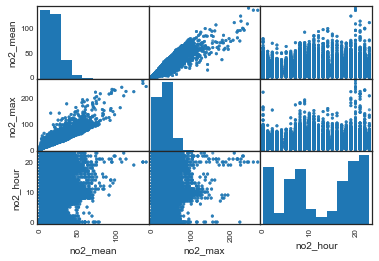

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(nitrogen_dioxide)

          no2_mean   no2_max  no2_hour
no2_mean  1.000000  0.896658  0.099896
no2_max   0.896658  1.000000  0.142654
no2_hour  0.099896  0.142654  1.000000


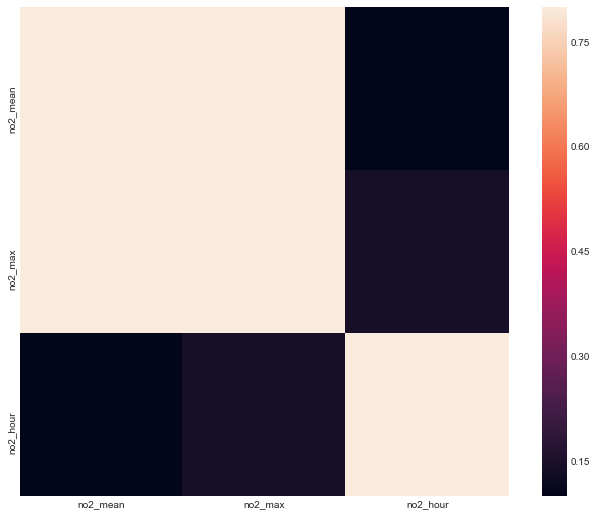

In [78]:
# Make the correlation matrix.
corrmat = nitrogen_dioxide.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

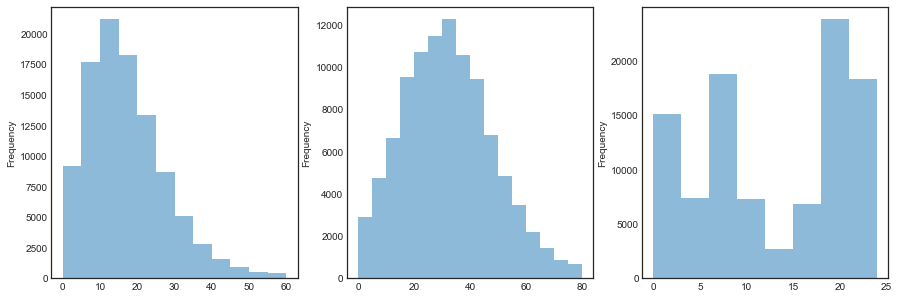

In [79]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
pollution_data['no2_mean'].plot.hist(alpha=0.5, bins=(0,5,10,15,20,25,30,35,40,45,50,55,60))
plt.subplot(1,3,2)
pollution_data['no2_max'].plot.hist(alpha=0.5, bins=(0,5,10,15,20,25,30,35,40,45,50,55,60, 65, 70,75,80))
plt.subplot(1,3,3)
pollution_data['no2_hour'].plot.hist(alpha=0.5, bins=(0,3, 6,9, 12, 15, 18, 21, 24))
plt.show()

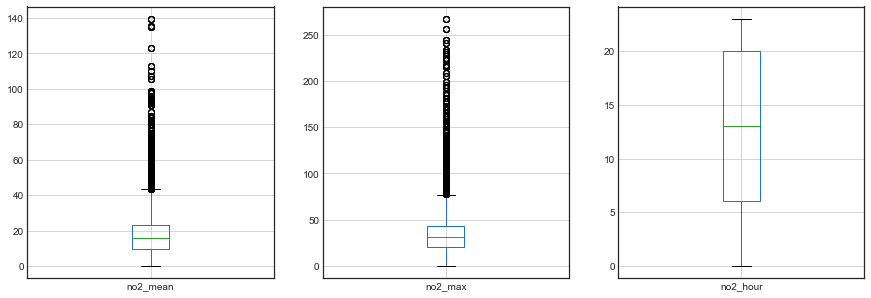

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
pollution_data.boxplot('no2_mean')
plt.subplot(1,3,2)
pollution_data.boxplot('no2_max')
plt.subplot(1,3,3)
pollution_data.boxplot('no2_hour')
plt.show()

### Bivariate

### Feature Engineering

In [38]:
print(pollution_data.head())
print(pollution_data.state.unique())

   row  state_code  country_code  site_num  \
0    0           4            13      3002   
1    1           4            13      3002   
2    2           4            13      3002   
3    3           4            13      3002   
4    4           4            13      3002   

                                   address    state    county     city  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   local_date          no2_units   no2_mean  no2_max  no2_hour  
0  2000-01-01  Parts per billion  19.041667     49.0        19  
1  2000-01-01  Parts per billion  19.041667     49.0        19  
2  2000-01-01  Parts per billion  19.041667     49.0        19  
3  2000-01-01  Par

In [70]:
pacific_sts = ['Washington', 'Oregon', 'California']
west_sts = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'Utah', 'Nevada']
southwest_sts = ['Texas', 'Oklahoma', 'New Mexico', 'Arizona']
midwest_sts = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Kentucky', 'Ohio', 'West Virginia']
south_sts = ['Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']
northeast_sts = ['Massachusetts', 'New York', 'Pennsylvania', 'Vermont', 'Maine', 'Rhode Island', 'New Jersey', 'New Hampshire', 'Connecticut', 'Delaware', 'Maryland', 'Virginia']

In [71]:
features = pd.get_dummies(pollution_data['state'])
features['pacific'] = np.where((pollution_data['state'].isin(pacific_sts)), 1, 0)
print(pd.crosstab(features['pacific'], pollution_data['state']))

state    Arizona  California  Colorado  District Of Columbia  Florida  \
pacific                                                                 
0           7146           0      1460                  1456     1424   
1              0       39514         0                     0        0   

state    Illinois  Indiana  Kansas  Kentucky  Louisiana  Michigan  Missouri  \
pacific                                                                       
0            2816      668    2952      5466       1464       714      5172   
1               0        0       0         0          0         0         0   

state    New Jersey  New York  North Carolina  Oklahoma  Pennsylvania  Texas  \
pacific                                                                        
0              1434      3764            1448      1076         12910   4024   
1                 0         0               0         0             0      0   

state    Virginia  
pacific            
0            5092  
1        

In [72]:
features['west'] = np.where((pollution_data['state'].isin(west_sts)), 1, 0)
print(pd.crosstab(features['west'], pollution_data['state']))

state  Arizona  California  Colorado  District Of Columbia  Florida  Illinois  \
west                                                                            
0         7146       39514         0                  1456     1424      2816   
1            0           0      1460                     0        0         0   

state  Indiana  Kansas  Kentucky  Louisiana  Michigan  Missouri  New Jersey  \
west                                                                          
0          668    2952      5466       1464       714      5172        1434   
1            0       0         0          0         0         0           0   

state  New York  North Carolina  Oklahoma  Pennsylvania  Texas  Virginia  
west                                                                      
0          3764            1448      1076         12910   4024      5092  
1             0               0         0             0      0         0  


In [73]:
features['southwest'] = np.where((pollution_data['state'].isin(southwest_sts)), 1, 0)
print(pd.crosstab(features['southwest'], pollution_data['state']))

state      Arizona  California  Colorado  District Of Columbia  Florida  \
southwest                                                                 
0                0       39514      1460                  1456     1424   
1             7146           0         0                     0        0   

state      Illinois  Indiana  Kansas  Kentucky  Louisiana  Michigan  Missouri  \
southwest                                                                       
0              2816      668    2952      5466       1464       714      5172   
1                 0        0       0         0          0         0         0   

state      New Jersey  New York  North Carolina  Oklahoma  Pennsylvania  \
southwest                                                                 
0                1434      3764            1448         0         12910   
1                   0         0               0      1076             0   

state      Texas  Virginia  
southwest                   
0              

In [74]:
features['midwest'] = np.where((pollution_data['state'].isin(midwest_sts)), 1, 0)
print(pd.crosstab(features['midwest'], pollution_data['state']))

state    Arizona  California  Colorado  District Of Columbia  Florida  \
midwest                                                                 
0           7146       39514      1460                  1456     1424   
1              0           0         0                     0        0   

state    Illinois  Indiana  Kansas  Kentucky  Louisiana  Michigan  Missouri  \
midwest                                                                       
0               0        0       0         0       1464         0         0   
1            2816      668    2952      5466          0       714      5172   

state    New Jersey  New York  North Carolina  Oklahoma  Pennsylvania  Texas  \
midwest                                                                        
0              1434      3764            1448      1076         12910   4024   
1                 0         0               0         0             0      0   

state    Virginia  
midwest            
0            5092  
1        

In [75]:
features['south'] = np.where((pollution_data['state'].isin(south_sts)), 1, 0)
print(pd.crosstab(features['south'], pollution_data['state']))

state  Arizona  California  Colorado  District Of Columbia  Florida  Illinois  \
south                                                                           
0         7146       39514      1460                  1456        0      2816   
1            0           0         0                     0     1424         0   

state  Indiana  Kansas  Kentucky  Louisiana  Michigan  Missouri  New Jersey  \
south                                                                         
0          668    2952      5466          0       714      5172        1434   
1            0       0         0       1464         0         0           0   

state  New York  North Carolina  Oklahoma  Pennsylvania  Texas  Virginia  
south                                                                     
0          3764               0      1076         12910   4024      5092  
1             0            1448         0             0      0         0  


In [76]:
features['north_east'] = np.where((pollution_data['state'].isin(northeast_sts)), 1, 0)
print(pd.crosstab(features['north_east'], pollution_data['state']))


state       Arizona  California  Colorado  District Of Columbia  Florida  \
north_east                                                                 
0              7146       39514      1460                  1456     1424   
1                 0           0         0                     0        0   

state       Illinois  Indiana  Kansas  Kentucky  Louisiana  Michigan  \
north_east                                                             
0               2816      668    2952      5466       1464       714   
1                  0        0       0         0          0         0   

state       Missouri  New Jersey  New York  North Carolina  Oklahoma  \
north_east                                                             
0               5172           0         0            1448      1076   
1                  0        1434      3764               0         0   

state       Pennsylvania  Texas  Virginia  
north_east                                 
0                      0   40

In [77]:
pollution_data['no2_mean'].describe()

count    100000.000000
mean         17.443198
std          11.301574
min           0.000000
25%           9.565217
50%          15.500000
75%          23.043478
max         139.541667
Name: no2_mean, dtype: float64

In [46]:
features['high_no2_mean'] = np.where(pollution_data['no2_mean']>=23.043478, 1, 0)
print(pollution_data['no2_mean'].groupby(features['high_no2_mean']).describe())

                 count       mean        std        min        25%        50%  \
high_no2_mean                                                                   
0              74982.0  12.398449   5.857396   0.000000   8.043478  12.500000   
1              25018.0  32.562927  10.140273  23.043478  25.833333  29.478261   

                     75%         max  
high_no2_mean                         
0              17.083333   23.041667  
1              35.708333  139.541667  


In [81]:
features['pm_no2_max'] = np.where(pollution_data['no2_hour']>=12, 1, 0)
print(pollution_data['no2_hour'].groupby(features['pm_no2_max']).describe())

              count       mean       std   min   25%   50%   75%   max
pm_no2_max                                                            
0           48446.0   4.921232  3.447722   0.0   1.0   6.0   7.0  11.0
1           51554.0  19.388214  2.472059  12.0  18.0  20.0  21.0  23.0


In [51]:
print(features)

       Arizona  California  Colorado  District Of Columbia  Florida  Illinois  \
0            1           0         0                     0        0         0   
1            1           0         0                     0        0         0   
2            1           0         0                     0        0         0   
3            1           0         0                     0        0         0   
4            1           0         0                     0        0         0   
5            1           0         0                     0        0         0   
6            1           0         0                     0        0         0   
7            1           0         0                     0        0         0   
8            1           0         0                     0        0         0   
9            1           0         0                     0        0         0   
10           1           0         0                     0        0         0   
11           1           0  

cities with number of stations   --> need to find distribution of stations to see 20% percentile
data has four lines for each value in no2    --> want to select just one value
no2 max by month    --> need 12 different features?
no2 mean by month   --> need 12 different features?

